# AdaBoost from Scratch (Reference from github) :

https://github.com/AlvaroCorrales/AdaBoost/blob/main/AdaBoost.py

In [1]:
# !wget https://www.dropbox.com/s/vhetvw5usngkbeg/Recipes.csv

In [2]:
import pandas as pd
data = pd.read_csv("Recipes.csv")

In [3]:
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data['cuisine'].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [5]:
data.shape

(2448, 384)

In [6]:
data.isna().sum().sum() # No missing values

0

In [7]:
vc = data['cuisine'].value_counts(normalize=True)
vc

korean      0.326389
indian      0.244281
chinese     0.180556
japanese    0.130719
thai        0.118056
Name: cuisine, dtype: float64

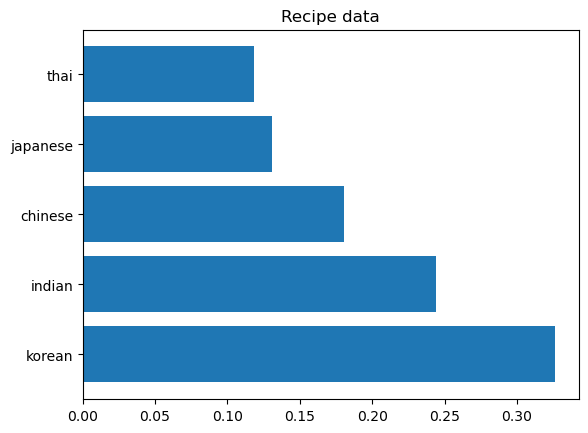

In [8]:
import matplotlib.pyplot as plt
plt.barh(vc.index, vc.values)
plt.title("Recipe data")
plt.show()

In [9]:
#  Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [10]:
le = LabelEncoder()
data['cuisine'] = le.fit_transform(data['cuisine'])

In [11]:
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
le.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

In [13]:
# Select the features
X = data.drop(columns='cuisine')
y = data['cuisine']

In [14]:
# Split on the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8,test_size=0.3)

In [15]:
# Train the model
dt_clf = DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.47346938775510206

In [16]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.6)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test,y_pred)

0.7346938775510204

In [17]:
import joblib
joblib.dump(ada, "final_model.bin")

['final_model.bin']

In [18]:
import sklearn
sklearn.__version__

'1.2.2'

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

ada = AdaBoostClassifier(base_estimator = log, n_estimators=100, learning_rate=0.6)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test,y_pred)

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7700680272108843

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier

# Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7904761904761904

# XGBoost

In [26]:
!conda install -c conda-forge py-xgboost-cpu -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::jupyterlab_server==2.22.0=py311hca03da5_0
  - defaults/osx-arm64::notebook==6.5.4=py311hca03da5_0
  - defaults/osx-arm64::anaconda-client==1.11.3=py311hca03da5_0
  - defaults/osx-arm64::black==23.3.0=py311hca03da5_0
  - defaults/osx-arm64::conda-repo-cli==1.0.41=py311hca03da5_0
  - defaults/osx-arm64::anaconda-project==0.11.1=py311hca03da5_0
  - defaults/osx-arm64::python-lsp-black==1.2.1=py311hca03da5_0
  - defaults/osx-arm64::jupyter_console==6.6.3=py311hca03da5_0
  - defaults/osx-arm64::nbformat==5.7.0=py311hca03da5_0
  - defaults/osx-arm64::jupyter_core==5.3.0=py311hca03da5_0
  - defaults/osx-arm64::transformers==4.29.2=py311hca03da5_0
  - defaults/osx-arm64::jupyter_server==2.5.0=py311hca03da5_0
  - defaults/osx-arm64::nbconvert==6.5.4=py311hca03da5_0
  - defaults/osx-arm64::pylint==2.16.2=py311hca03da5_0
  

In [27]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 100, learning_rate=0.2)
xgb_clf.fit(X_train,y_train)

y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7972789115646258

In [ ]:
[1,0.1,0.01,0.001,0.0001,10,100]